In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

# Caricamento del dataset

In [3]:
df = pd.read_csv('datasets/cars_dataset.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,two,two,small,low,unacc
1,vhigh,vhigh,two,two,small,med,unacc
2,vhigh,vhigh,two,two,small,high,unacc
3,vhigh,vhigh,two,two,med,low,unacc
4,vhigh,vhigh,two,two,med,med,unacc


# Esplorazione dei dati

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


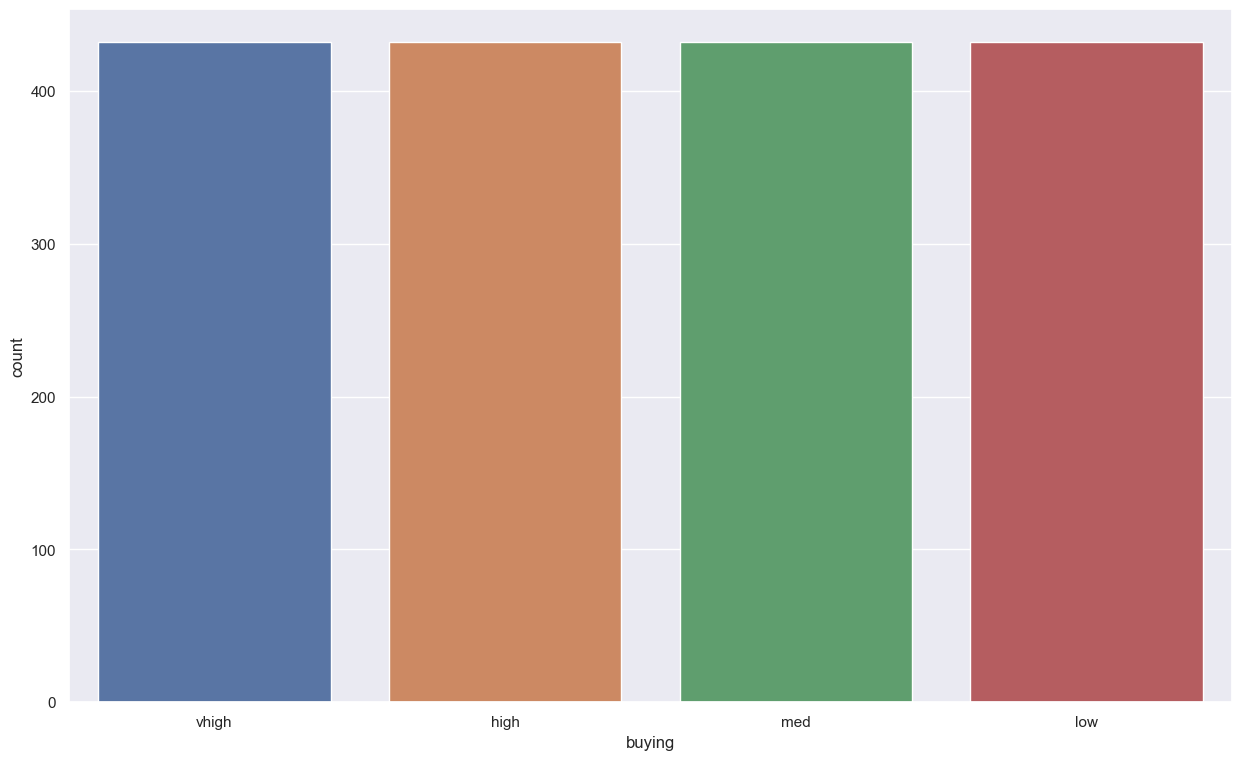

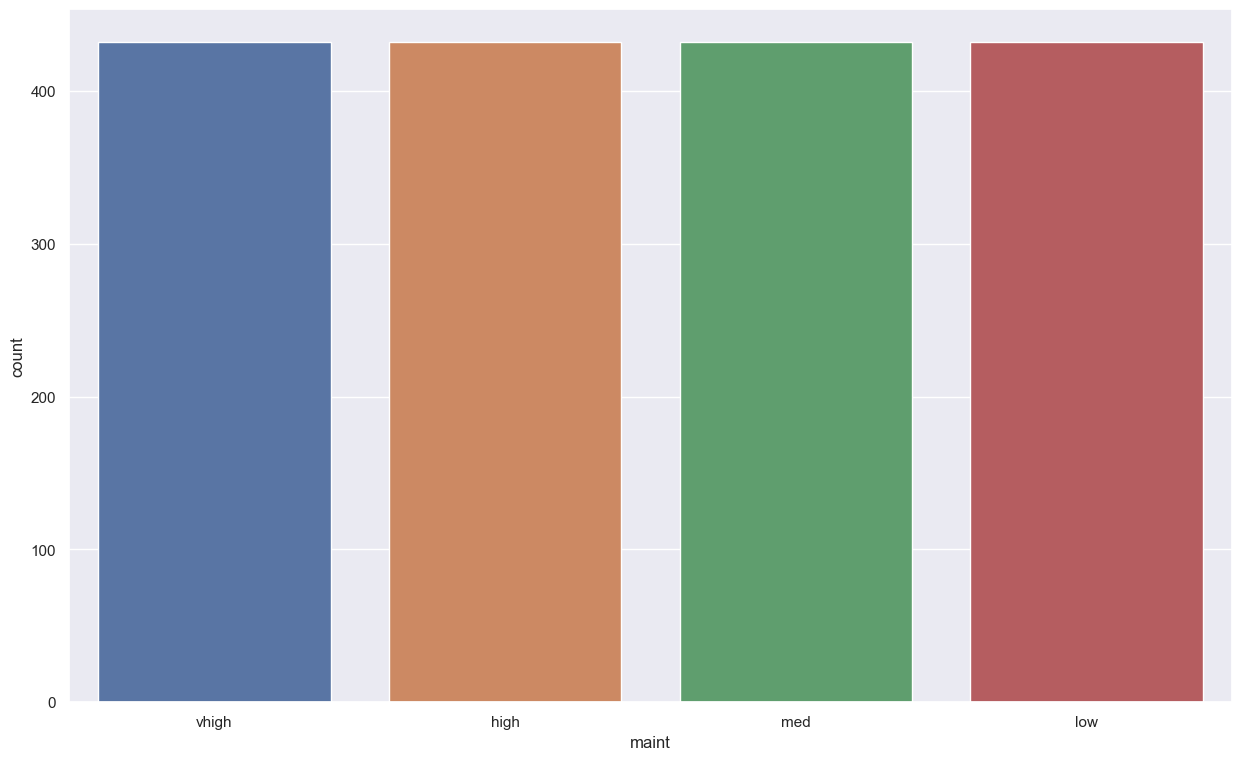

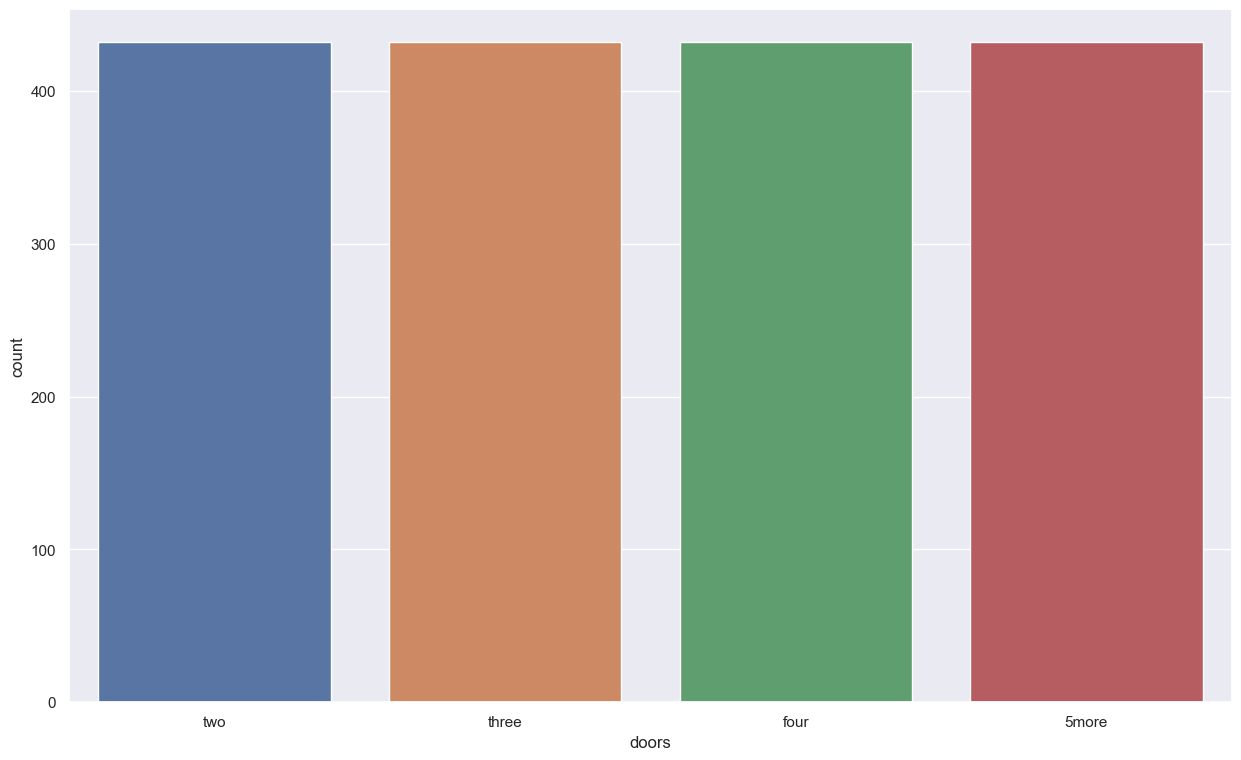

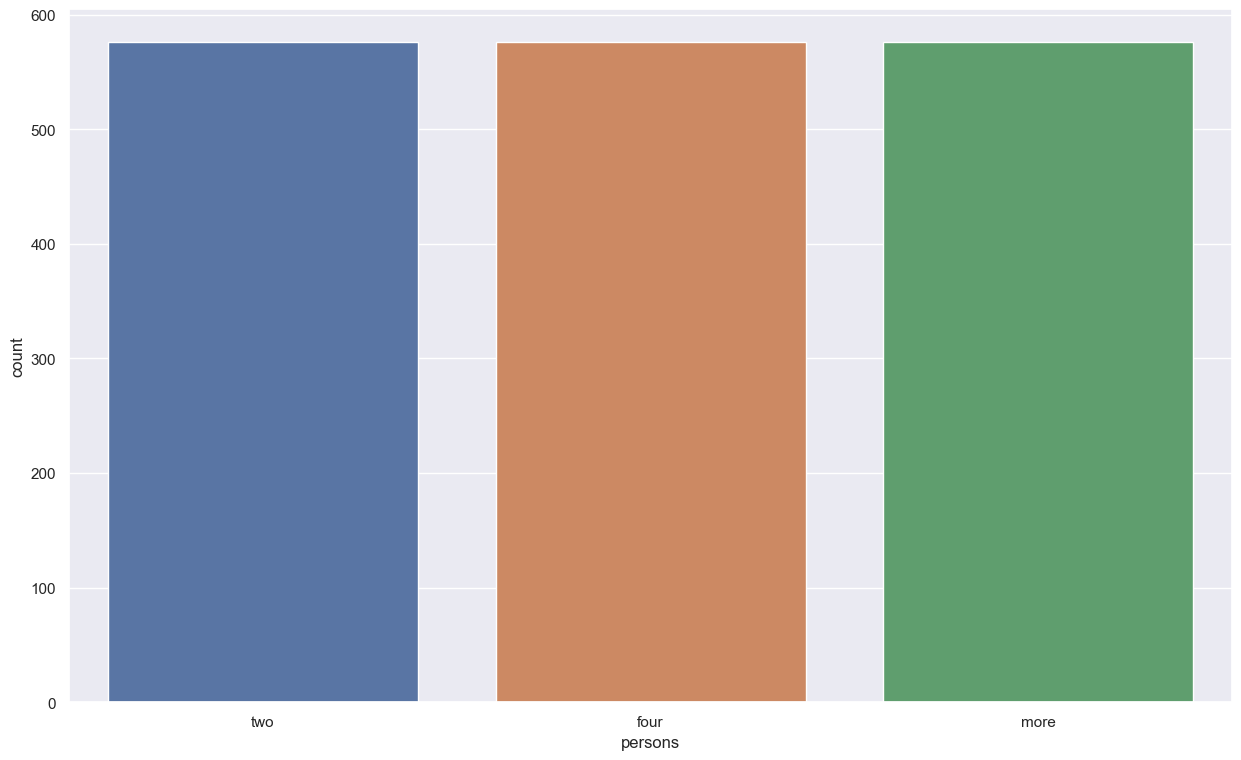

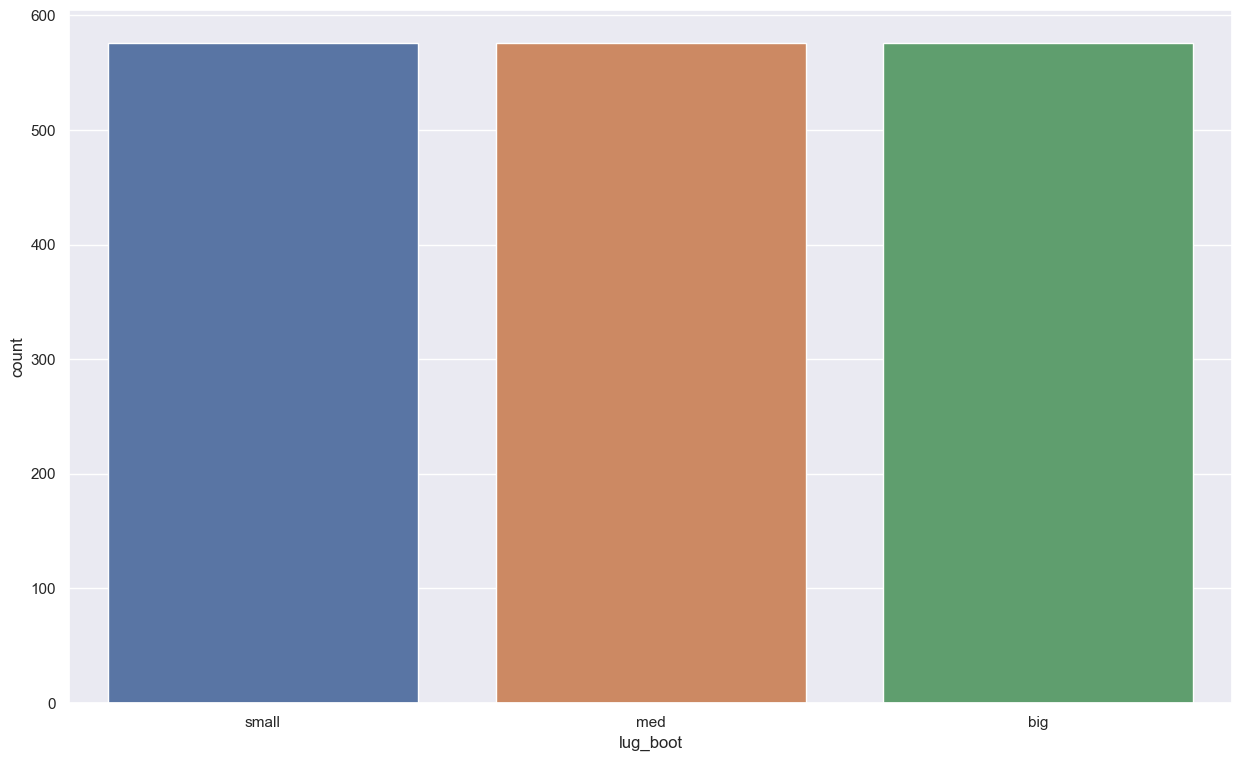

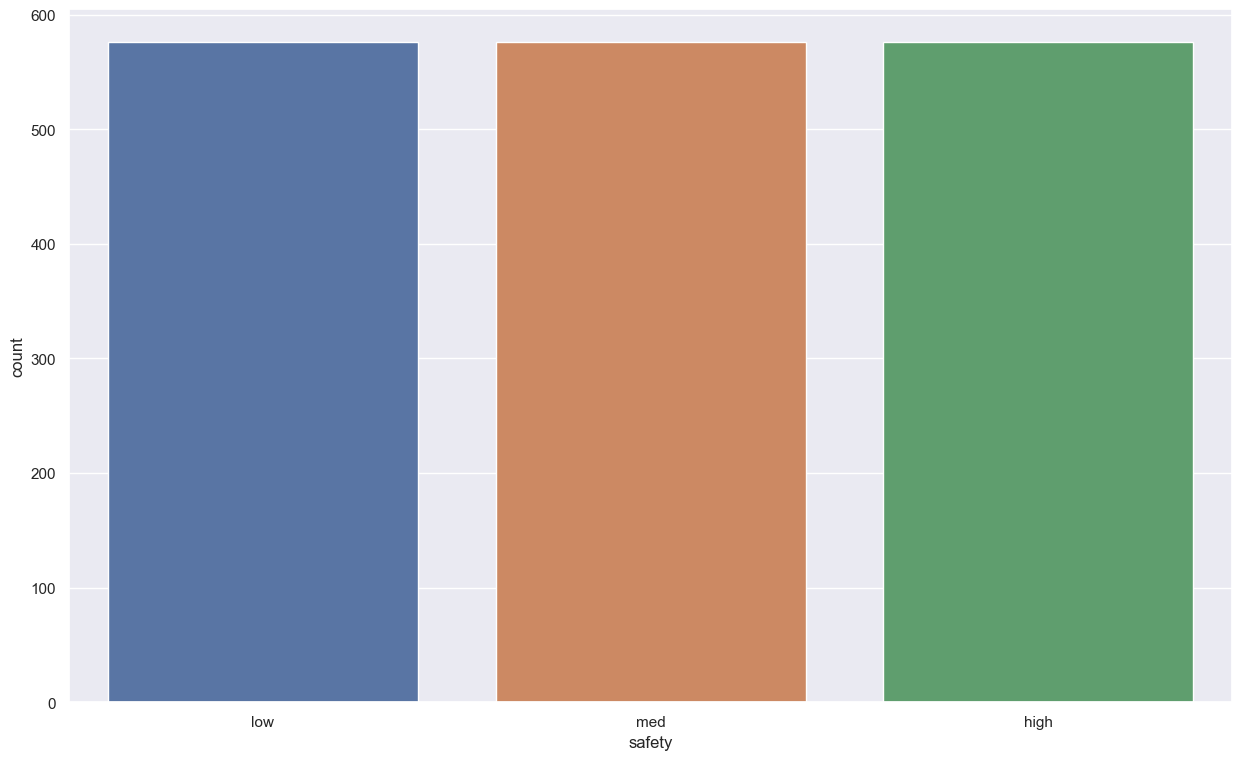

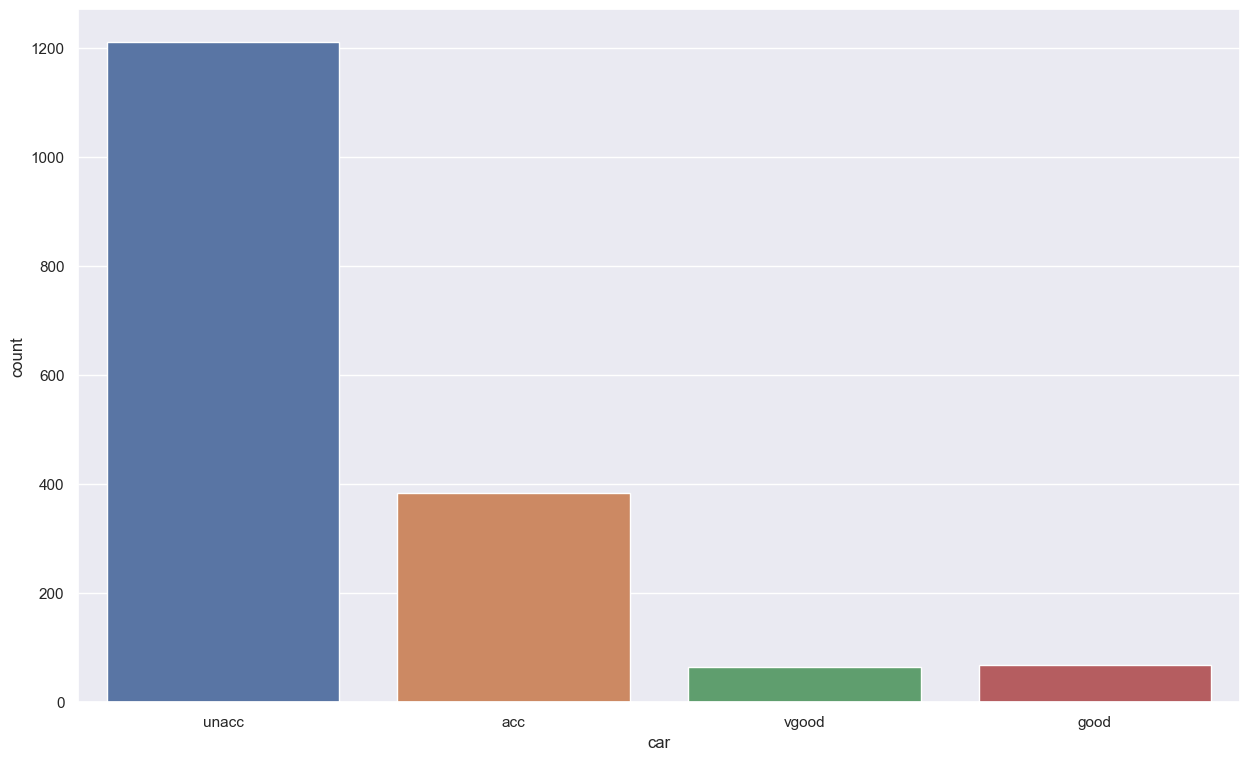

In [5]:
sns.set_theme(style="darkgrid")
for col in df.columns:
    plt.figure(figsize=(15,9))
    sns.countplot(x=col, data=df)
    plt.show()

In [6]:
df.isnull().sum().sort_values(ascending=False)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car         0
dtype: int64

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,two,two,small,low
1,vhigh,vhigh,two,two,small,med
2,vhigh,vhigh,two,two,small,high
3,vhigh,vhigh,two,two,med,low
4,vhigh,vhigh,two,two,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [9]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: car, Length: 1728, dtype: object

# Preparazione dei dati

In [10]:
# codifica one-hot
X = pd.get_dummies(data=X,columns=X.columns)
X

,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_5more,doors_four,...,doors_two,persons_four,persons_more,persons_two,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1724,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1725,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1726,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [11]:
#codifica label per la variabile target

from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
y

array([2, 2, 2, ..., 2, 1, 3])

In [12]:
#divisione in train e test set

seed = 45
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=seed,stratify=y)

In [13]:
# normalizzazione
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Costruzione del modello

In [14]:
#ottimizzazione dei classificatori
tree = GridSearchCV(DecisionTreeClassifier(random_state=seed),{'criterion':['gini','entropy']})
lr = GridSearchCV(LogisticRegression(penalty='l2',random_state=seed),{'C':[0.0001,0.001,0.01,0.1,1.0,10.0]})

# aggiunta di altri classificatori non ottimizzati
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),n_estimators=20,random_state=seed)
forest = RandomForestClassifier(n_estimators=500,random_state=seed,criterion='gini')

In [15]:
#applicazione dei classificatori ottimizzati sui dati preprocessati

models = {'Albero Decisionale':tree,'Discriminante Logistico':lr}
for k in models.keys():
    if k == 'Albero Decisionale':
        models[k].fit(X_train,y_train)
        y_pred = models[k].predict(X_test)
    else:
        models[k].fit(X_train_sc,y_train)
        y_pred = models[k].predict(X_test_sc)
    print(f'{k:25} {accuracy_score(y_test,y_pred):.3f}')

Albero Decisionale        0.984
Discriminante Logistico   0.926


In [16]:
#applicazione dei classificatori non ottimizzati sui dati preprocessati

bagging.fit(X_train_sc,y_train)
y_pred = bagging.predict(X_test_sc)
print(f'{"Bagging":25} {accuracy_score(y_test,y_pred):.3f}')

forest.fit(X_train,y_train)
y_pred = forest.predict(X_test)
print(f'{"Random Forest":25} {accuracy_score(y_test,y_pred):.3f}')

Bagging                   0.859
Random Forest             0.970
